In [1]:
# 这是导入包环节
import numpy as np
import matplotlib.pyplot as plt
from testCases import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

In [2]:
%matplotlib inline
np.random.seed(1)

In [18]:
X, Y = load_planar_dataset()
# X(2, 400), Y(1, 400)

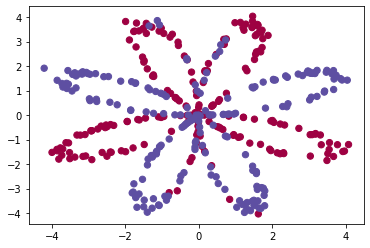

In [5]:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)

In [19]:
shape_X = X.shape
shape_Y = Y.shape
m = shape_Y[1]

print("the shape of X is " + str(shape_X))
print("the shape of Y is " + str(shape_Y))
print("the number of samples is " + str(m))

the shape of X is (2, 400)
the shape of Y is (1, 400)
the number of samples is 400


In [20]:
# 这个是线性模型的结果
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegressionCV()

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


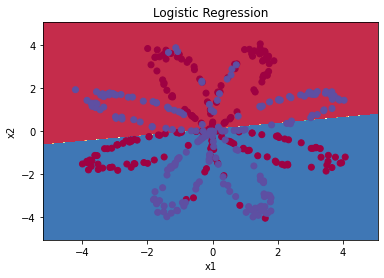

In [21]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")

In [22]:
# 定义神经网络的结构
# 需要的参数 n_x 输入层的大小 n_h 隐藏层的大小 n_y 输出层的大小
def layers_size(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [23]:
X_assess, Y_assess = layer_sizes_test_case()
(n_x, n_h, n_y) = layers_size(X_assess, Y_assess)
print("输入层是" + str(n_x))
print("隐藏层是" + str(n_h))
print("输出层是" + str(n_y))

输入层是5
隐藏层是4
输出层是2


In [24]:
# 初始化模型的参数
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [48]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [59]:
# 开始完成循环部分的函数 --前向传播
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    # Implement Forward Propagation to calculate A2 (probabilities)
    z1 = np.dot(W1, X) + b1
    a1 = np.tanh(z1)
    z2 = np.dot(W2, a1) + b2
    a2 = sigmoid(z2)
    
    cache = {
        "Z1": z1,
        "Z2": z2,
        "A1": a1,
        "A2": a2
    }
    return a2, cache

In [60]:
X_assess, parameters = forward_propagation_test_case()
print(X_assess)
print(parameters)
A2, cache = forward_propagation(X_assess, parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
{'W1': array([[-0.00416758, -0.00056267],
       [-0.02136196,  0.01640271],
       [-0.01793436, -0.00841747],
       [ 0.00502881, -0.01245288]]), 'W2': array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'b2': array([[0.]])}
-0.0004997557777419902 -0.000496963353231779 0.00043818745095914653 0.500109546852431


In [118]:
# 开始完成循环部分的函数 -- 计算损失函数
# 值得注意的是我们这里的损失函数使用的是y * log（a)
def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    m = Y.shape[1]
    # Retrieve W1 and W2 from parameters
    W1 = parameters['W1']
    W2 = parameters['W2']
    # Compute the cross-entropy cost
    cost1 = (np.dot(Y, np.log(A2).T) + np.dot((1-Y), np.log(1-A2).T)) / (-m)
    temp = np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
    cost2 = np.sum(temp) / (-m)
    
    cost1 = np.squeeze(cost2)  
    return cost2

In [119]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6929198937761266


In [120]:
# 完成循环部分的函数 -- 进行后向传播
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dz2 = A2 - Y
    dw2 = np.dot(dz2, A1.T) / m
    db2 = (1 / m) * np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.multiply(np.dot(W2.T, dz2), 1 - np.power(A1, 2))
    dw1 = (1 / m) * np.dot(dz1, X.T)
    db1 = (1 / m) * np.sum(dz1, axis=1, keepdims=True)
    
    grads = {"dW1": dw1,
             "db1": db1,
             "dW2": dw2,
             "db2": db2}
    
    return grads

In [121]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.01018708 -0.00708701]
 [ 0.00873447 -0.0060768 ]
 [-0.00530847  0.00369379]
 [-0.02206365  0.01535126]]
db1 = [[-0.00069728]
 [-0.00060606]
 [ 0.000364  ]
 [ 0.00151207]]
dW2 = [[ 0.00363613  0.03153604  0.01162914 -0.01318316]]
db2 = [[0.06589489]]


In [122]:
# 进行参数的更新
def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dw1 = grads['dW1']
    dw2 = grads['dW2']
    db1 = grads['db1']
    db2 = grads['db2']
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dw1
    W2 = W2 - learning_rate * dw2
    b1 = b1 - learning_rate * db1
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [123]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


In [126]:
# 现在开始整合前面的内容
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    np.random.seed(3)
    n_x = layers_size(X, Y)[0]
    n_y = layers_size(X, Y)[2]
    
    # Initialize parameters, then retrieve W1, b1, W2, b2. Inputs: "n_x, n_h, n_y". Outputs = "W1, b1, W2, b2, parameters".
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        a2, cache = forward_propagation(X, parameters)
        cost = compute_cost(a2, Y ,parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate=1.2)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [127]:
X_assess, Y_assess = nn_model_test_case()

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.692584
Cost after iteration 1000: -inf
Cost after iteration 2000: -inf


C:\Users\hp\AppData\Local\Temp/ipykernel_20212/664800870.py:20: RuntimeWarning: divide by zero encountered in log
  cost1 = (np.dot(Y, np.log(A2).T) + np.dot((1-Y), np.log(1-A2).T)) / (-m)
C:\Users\hp\AppData\Local\Temp/ipykernel_20212/664800870.py:21: RuntimeWarning: divide by zero encountered in log
  temp = np.multiply(Y, np.log(A2)) + np.multiply((1-Y), np.log(1-A2))


Cost after iteration 3000: -inf
Cost after iteration 4000: -inf
Cost after iteration 5000: -inf
Cost after iteration 6000: -inf
Cost after iteration 7000: -inf
Cost after iteration 8000: -inf
Cost after iteration 9000: -inf
W1 = [[-4.1850109   5.33215613]
 [-7.52989203  1.24306223]
 [-4.19296277  5.32630994]
 [ 7.52984494 -1.24308896]]
b1 = [[ 2.32927242]
 [ 3.79459182]
 [ 2.33003101]
 [-3.79467233]]
W2 = [[-6033.83667709 -6008.12978115 -6033.10090499  6008.06626599]]
b2 = [[-52.6661178]]


In [128]:
# 预测
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = np.round(A2)
    ### END CODE HERE ###
    
    return predictions

In [129]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219497
Cost after iteration 9000: 0.218569


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

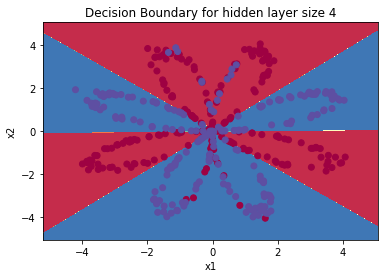

In [130]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [131]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.25 %


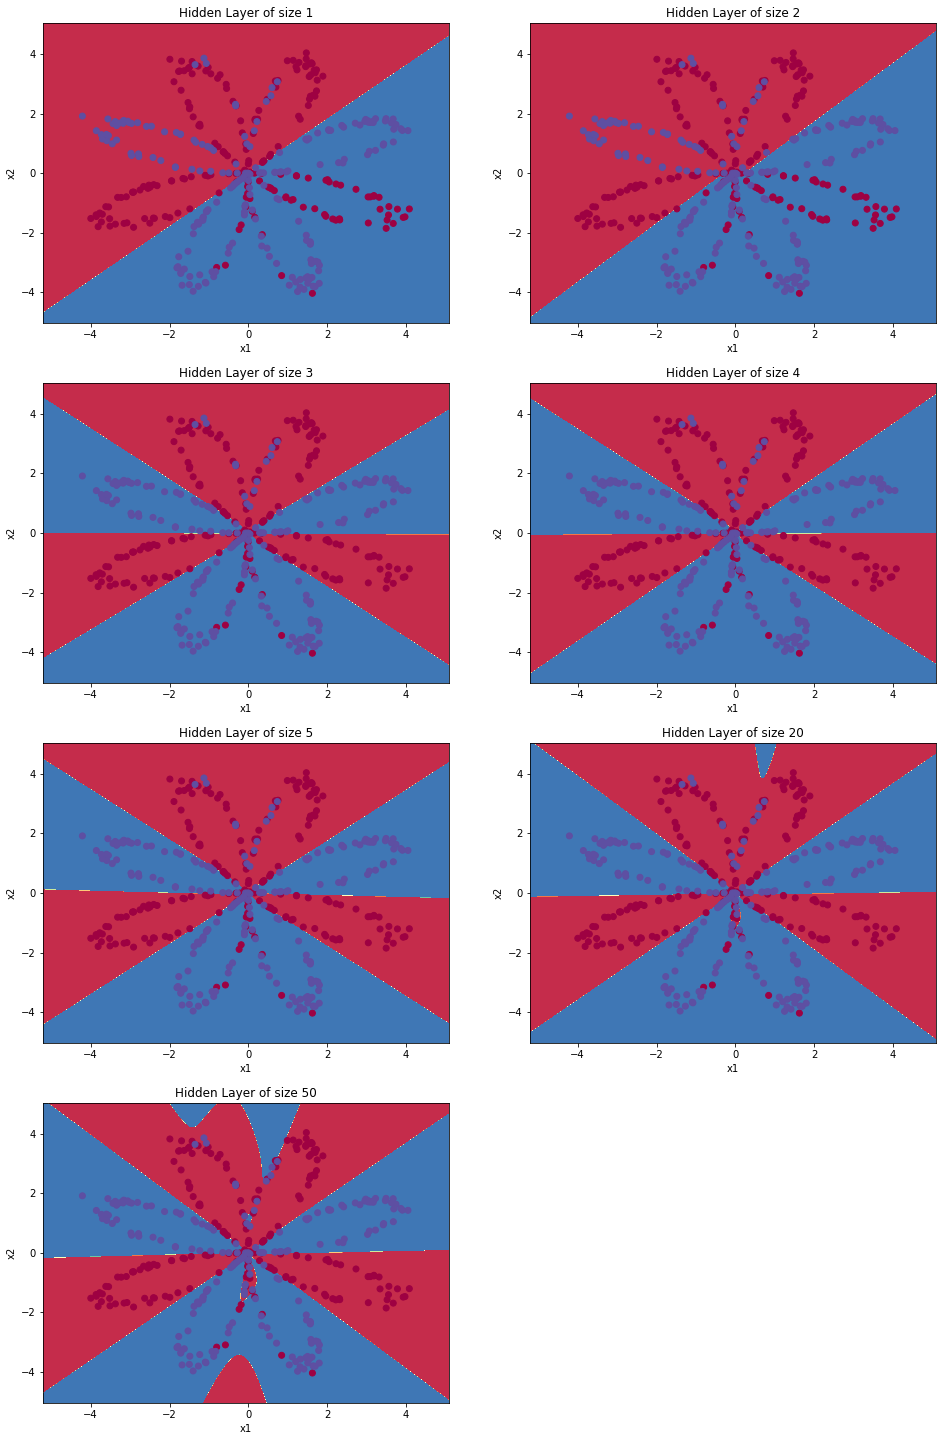

In [132]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))